Loading dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
dataset=pd.read_csv(r"C:\Users\nishi\Vs_Code_Projects\IIITD\SEM 5\Subjects\DSC\Project\NIFTY50_all.csv")

In [3]:
print(dataset.head(3))

         Date      Symbol Series  Prev Close   Open     High    Low   Last  \
0  2007-11-27  MUNDRAPORT     EQ       440.0  770.0  1050.00  770.0  959.0   
1  2007-11-28  MUNDRAPORT     EQ       962.9  984.0   990.00  874.0  885.0   
2  2007-11-29  MUNDRAPORT     EQ       893.9  909.0   914.75  841.0  887.0   

   Close    VWAP    Volume      Turnover  Trades  Deliverable Volume  \
0  962.9  984.72  27294366  2.687719e+15     NaN           9859619.0   
1  893.9  941.38   4581338  4.312765e+14     NaN           1453278.0   
2  884.2  888.09   5124121  4.550658e+14     NaN           1069678.0   

   %Deliverble  
0       0.3612  
1       0.3172  
2       0.2088  


In [4]:
print(dataset.info())
print()
print(dataset.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235192 entries, 0 to 235191
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                235192 non-null  object 
 1   Symbol              235192 non-null  object 
 2   Series              235192 non-null  object 
 3   Prev Close          235192 non-null  float64
 4   Open                235192 non-null  float64
 5   High                235192 non-null  float64
 6   Low                 235192 non-null  float64
 7   Last                235192 non-null  float64
 8   Close               235192 non-null  float64
 9   VWAP                235192 non-null  float64
 10  Volume              235192 non-null  int64  
 11  Turnover            235192 non-null  float64
 12  Trades              120344 non-null  float64
 13  Deliverable Volume  219115 non-null  float64
 14  %Deliverble         219115 non-null  float64
dtypes: float64(11), int64(1), object(3

We see that Trades, Deliverable Volume, %Deliverable have some null values which will need to be handled during pre-processing.

In [5]:
dataset=dataset.sort_values(by="Date")

In [6]:
stocks_update_count=[]
opening_avg=[]
closing_avg=[]
prev_closing_avg=[]
high_avg=[]
low_avg=[]
last_avg=[]
volume_avg=[]
turnover_avg=[]

dates=dataset["Date"].unique()

for i in dates:
    day_dataset=dataset[dataset["Date"]==i]
    stocks_update_count.append(len(day_dataset))
    opening_avg.append(day_dataset["Open"].mean())
    closing_avg.append(day_dataset["Close"].mean())
    prev_closing_avg.append(day_dataset["Prev Close"].mean())
    high_avg.append(day_dataset["High"].mean())
    low_avg.append(day_dataset["Low"].mean())
    last_avg.append(day_dataset["Last"].mean())
    volume_avg.append(day_dataset["Volume"].mean())
    turnover_avg.append(day_dataset["Turnover"].mean())

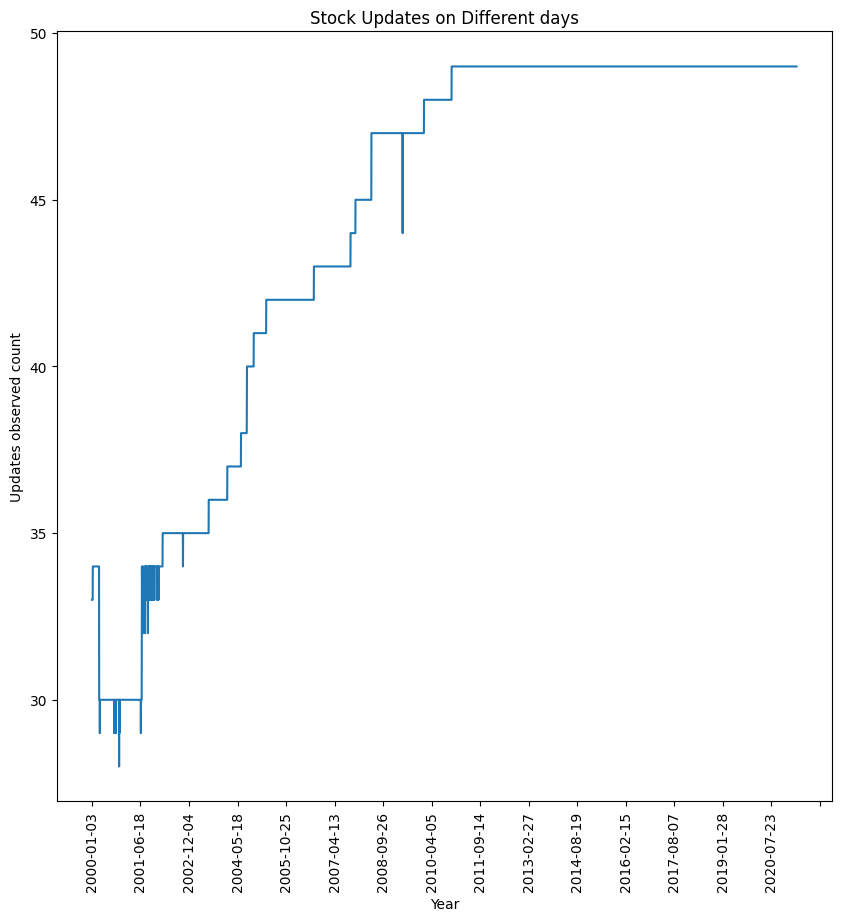

In [7]:
import matplotlib.dates as mdates
plt.figure(figsize=(10,10))
plt.plot(dates,stocks_update_count)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation="vertical")
plt.title("Stock Updates on Different days")
plt.xlabel("Year")
plt.ylabel("Updates observed count")
plt.show()

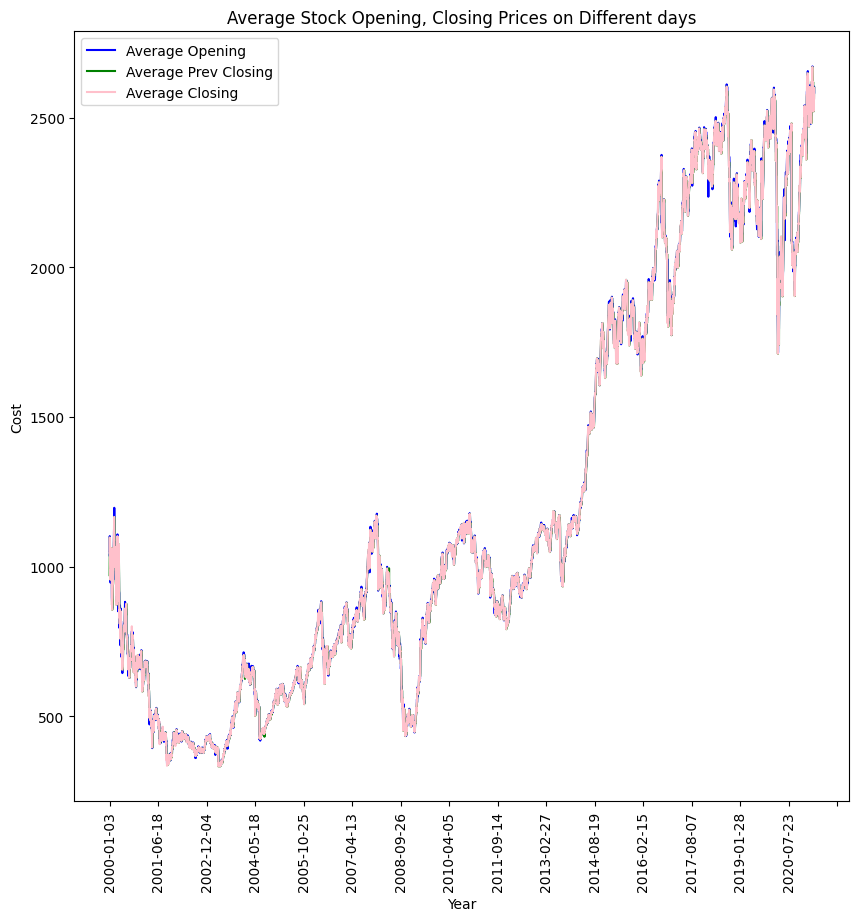

In [8]:
import matplotlib.dates as mdates
plt.figure(figsize=(10,10))
plt.plot(dates,opening_avg,color="Blue",label="Average Opening")
plt.plot(dates,prev_closing_avg,color="Green",label="Average Prev Closing")
plt.plot(dates,closing_avg,color="Pink",label="Average Closing")
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation="vertical")
plt.title("Average Stock Opening, Closing Prices on Different days")
plt.xlabel("Year")
plt.ylabel("Cost")
plt.legend()
plt.show()

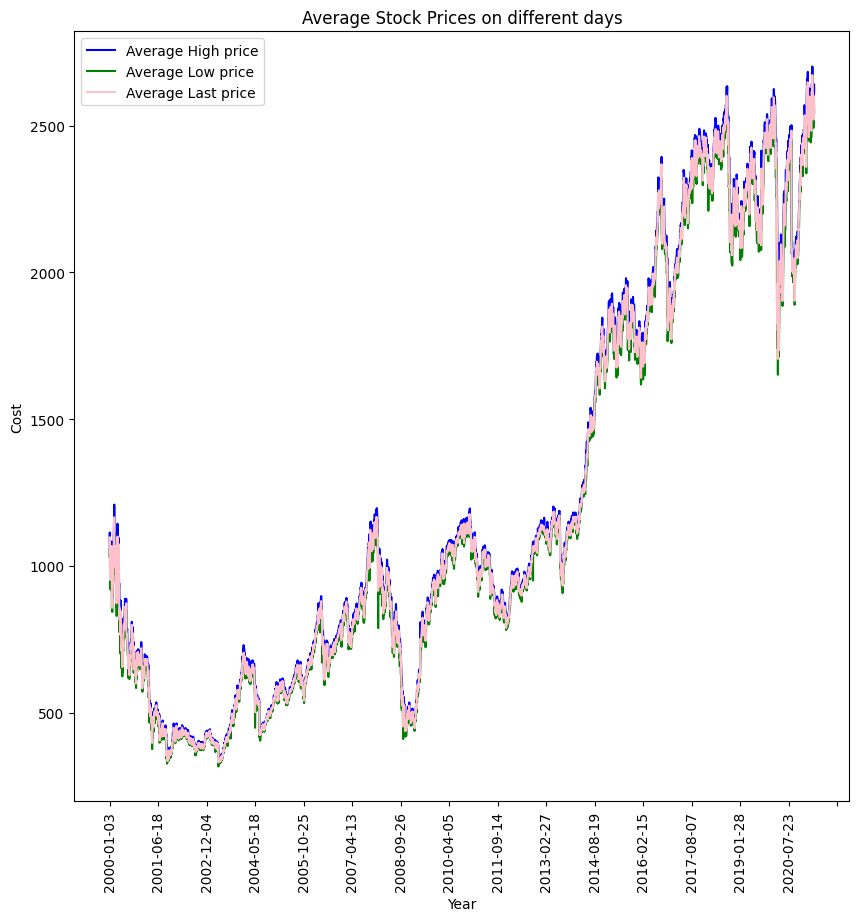

In [9]:
import matplotlib.dates as mdates
plt.figure(figsize=(10,10))
plt.plot(dates,high_avg,color="Blue",label="Average High price")
plt.plot(dates,low_avg,color="Green",label="Average Low price")
plt.plot(dates,last_avg,color="Pink",label="Average Last price")
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation="vertical")
plt.title("Average Stock Prices on different days")
plt.xlabel("Year")
plt.ylabel("Cost")
plt.legend()
plt.show()

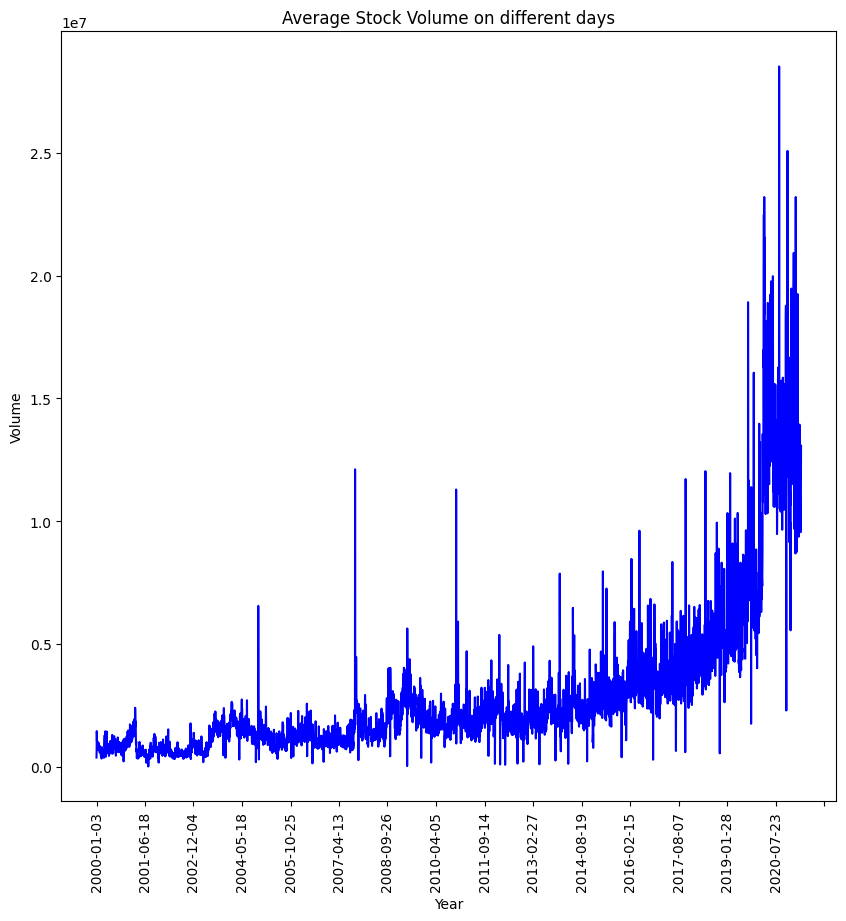

In [10]:
import matplotlib.dates as mdates
plt.figure(figsize=(10,10))
plt.plot(dates,volume_avg,color="Blue",label="Average Volume")
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation="vertical")
plt.title("Average Stock Volume on different days")
plt.xlabel("Year")
plt.ylabel("Volume")
plt.show()

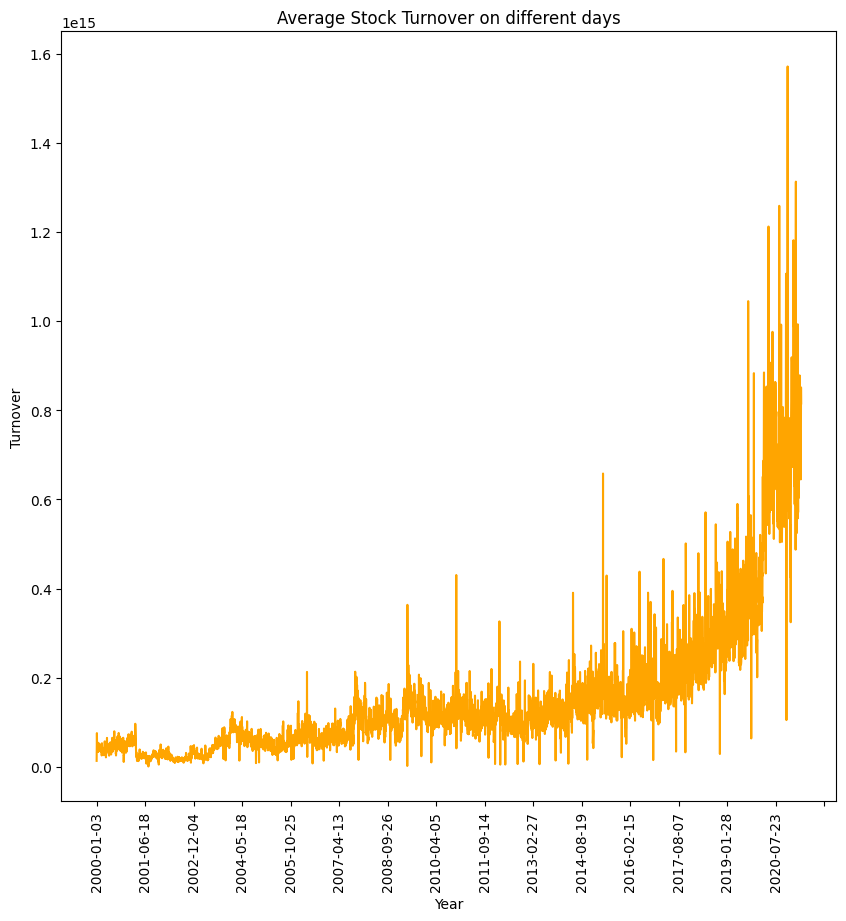

In [11]:
import matplotlib.dates as mdates
plt.figure(figsize=(10,10))
plt.plot(dates,turnover_avg,color="Orange",label="Average Turnover")
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation="vertical")
plt.title("Average Stock Turnover on different days")
plt.xlabel("Year")
plt.ylabel("Turnover")
plt.show()

In [12]:
labels=[]
values=[]
labels2=[]
values2=[]

labels.extend(dataset["Prev Close"])
values.extend(["Prev Close"]*len(dataset["Prev Close"]))

labels.extend(dataset["Open"])
values.extend(["Open"]*len(dataset["Open"]))

labels.extend(dataset["High"])
values.extend(["High"]*len(dataset["High"]))

labels.extend(dataset["Low"])
values.extend(["Low"]*len(dataset["Low"]))

labels.extend(dataset["Last"])
values.extend(["Last"]*len(dataset["Last"]))

labels.extend(dataset["Close"])
values.extend(["Close"]*len(dataset["Close"]))

labels.extend(dataset["VWAP"])
values.extend(["VWAP"]*len(dataset["VWAP"]))

labels.extend(dataset["Volume"])
values.extend(["Volume"]*len(dataset["Volume"]))

labels2.extend(dataset["Turnover"])
values2.extend(["Turnover"]*len(dataset["Turnover"]))

labels.extend(dataset["Trades"])
values.extend(["Trades"]*len(dataset["Trades"]))

labels.extend(dataset["Deliverable Volume"])
values.extend(["Deliverable Volume"]*len(dataset["Deliverable Volume"]))

labels.extend(dataset["%Deliverble"])
values.extend(["%Deliverble"]*len(dataset["%Deliverble"]))

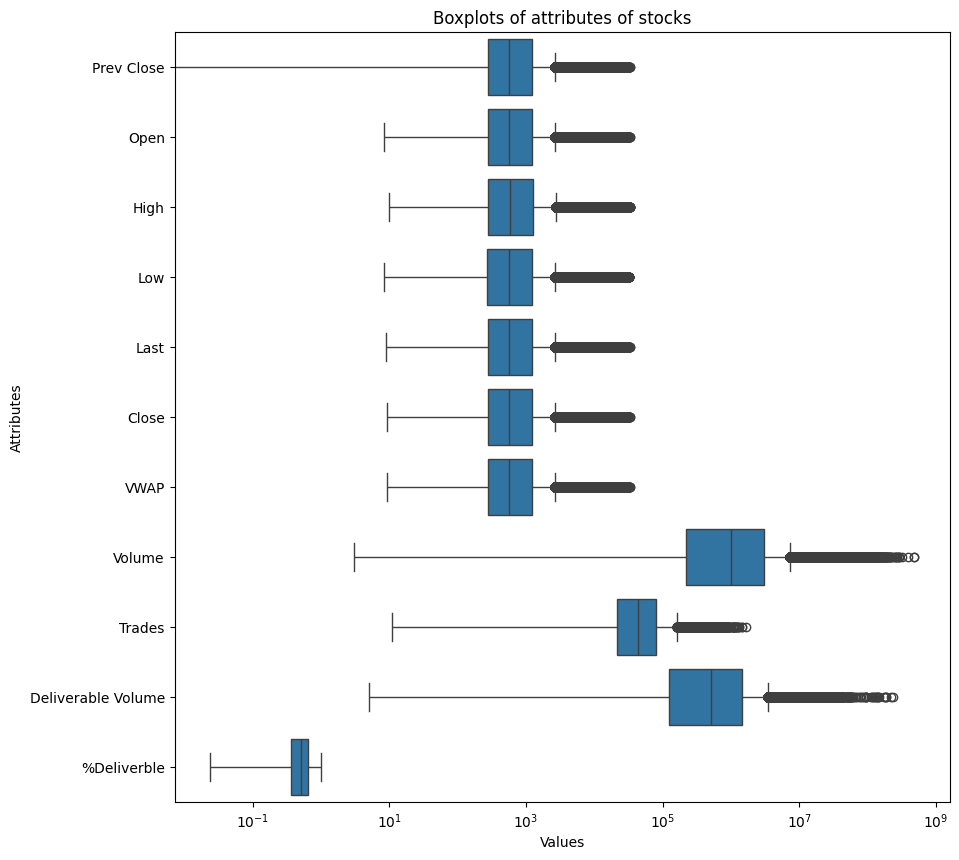

In [13]:
data={"label":labels,"values":values}
data_df=pd.DataFrame(data)
plt.figure(figsize=(10,10))
sns.boxplot(x='label',y='values',data=data_df)
plt.title('Boxplots of attributes of stocks')
plt.xlabel('Values')
plt.xscale('log')
plt.ylabel('Attributes')
plt.show()

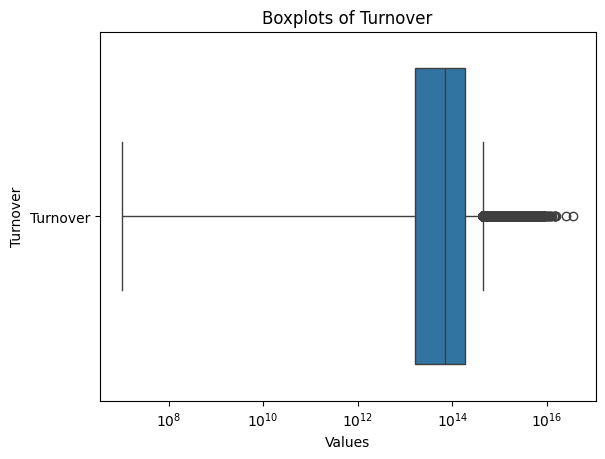

In [14]:
data={"label":labels2,"values":values2}
data_df=pd.DataFrame(data)
sns.boxplot(x='label',y='values',data=data_df)
plt.title('Boxplots of Turnover')
plt.xlabel('Values')
plt.xscale('log')
plt.ylabel('Turnover')
plt.show()

Clearly visible from above boxplots that we have a lot of extreme outliers. The outliers are even apart in magnitudes if powers of 10 than the inter-quartile range!!

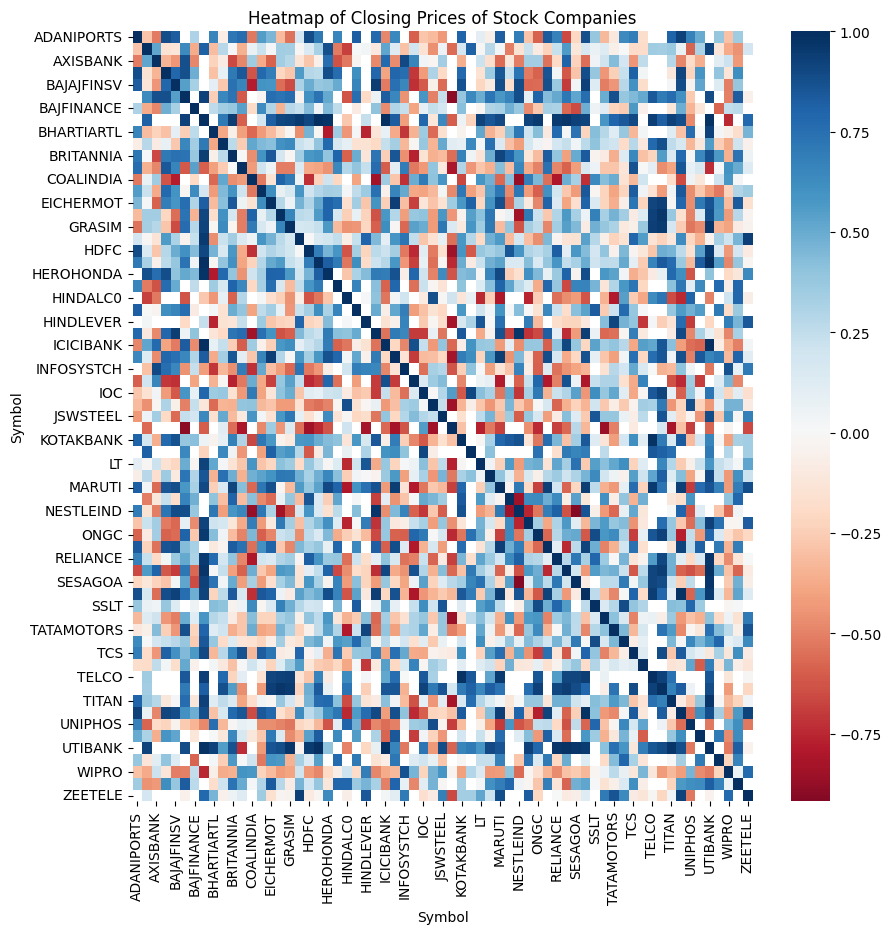

In [20]:
closing_prices = dataset.pivot(index='Date', columns='Symbol', values='Close')
correlation_matrix = closing_prices.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, cmap="RdBu", center=0)
plt.title("Heatmap of Closing Prices of Stock Companies")
plt.show()

We Observe that the heatmap has lots of blue and red shades, showing that there is lots of positive or negative correlation between stocks of different companies.

Graph of moving Average for 20 days, 50 days

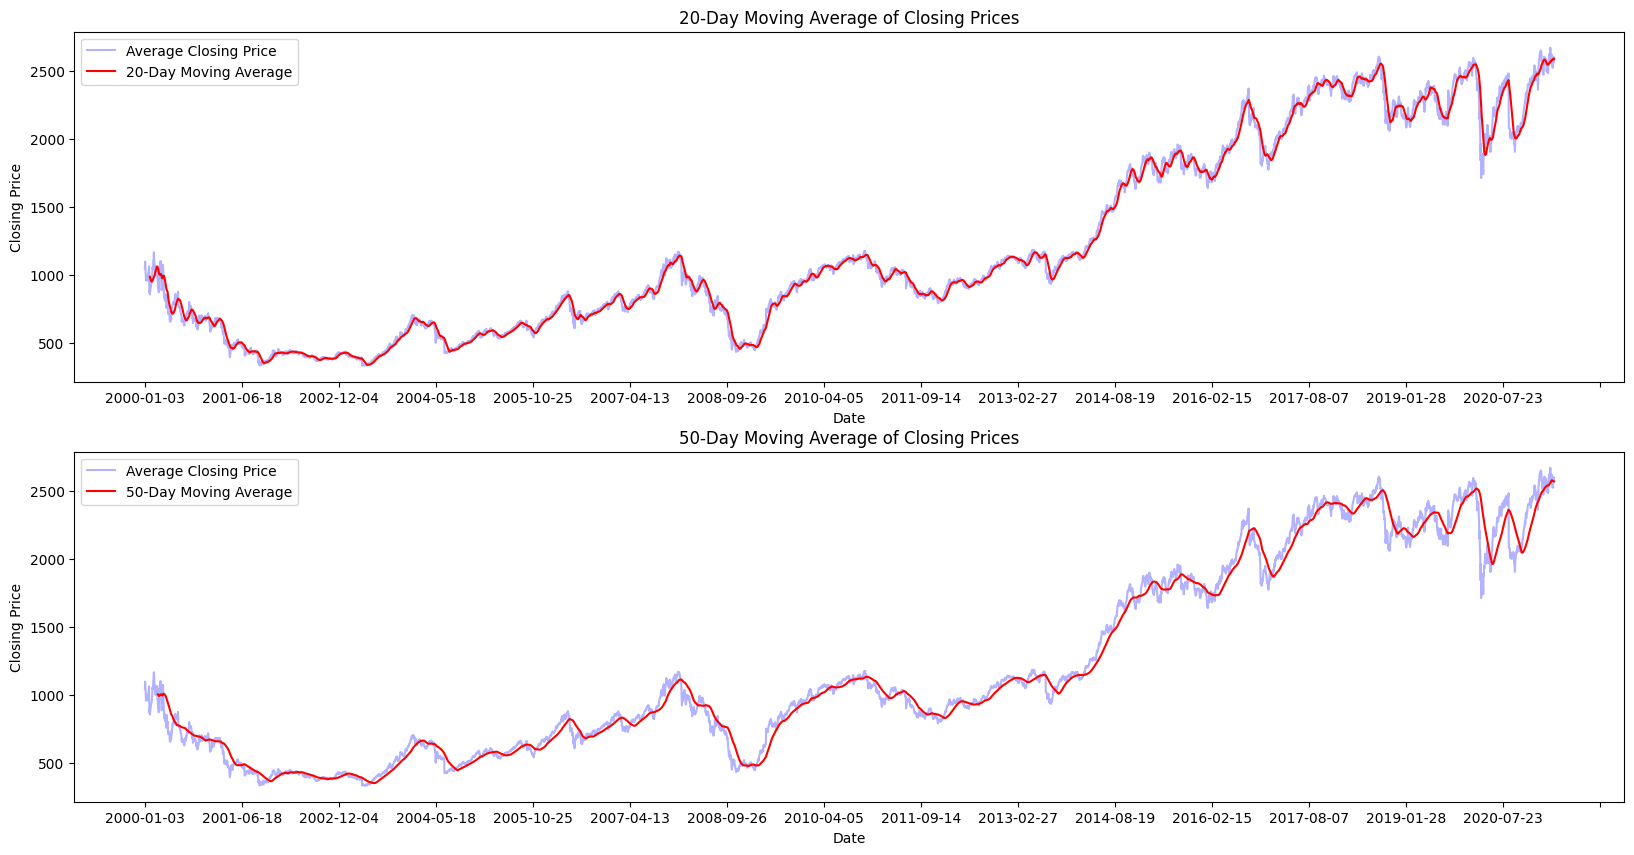

In [16]:
import matplotlib.dates as mdates

closing_avg_pd=pd.Series(closing_avg)
moving_avg_20=closing_avg_pd.rolling(window=20).mean()
moving_avg_50=closing_avg_pd.rolling(window=50).mean()

plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.plot(dates,closing_avg,label="Average Closing Price",color="blue",alpha=0.3)
plt.plot(dates,moving_avg_20,label="20-Day Moving Average",color="red")
plt.title("20-Day Moving Average of Closing Prices")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.legend()

plt.subplot(2,1,2)
plt.plot(dates,closing_avg,label="Average Closing Price",color="blue",alpha=0.3)
plt.plot(dates,moving_avg_50,label="50-Day Moving Average",color="red")
plt.title("50-Day Moving Average of Closing Prices")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.legend()

plt.show()

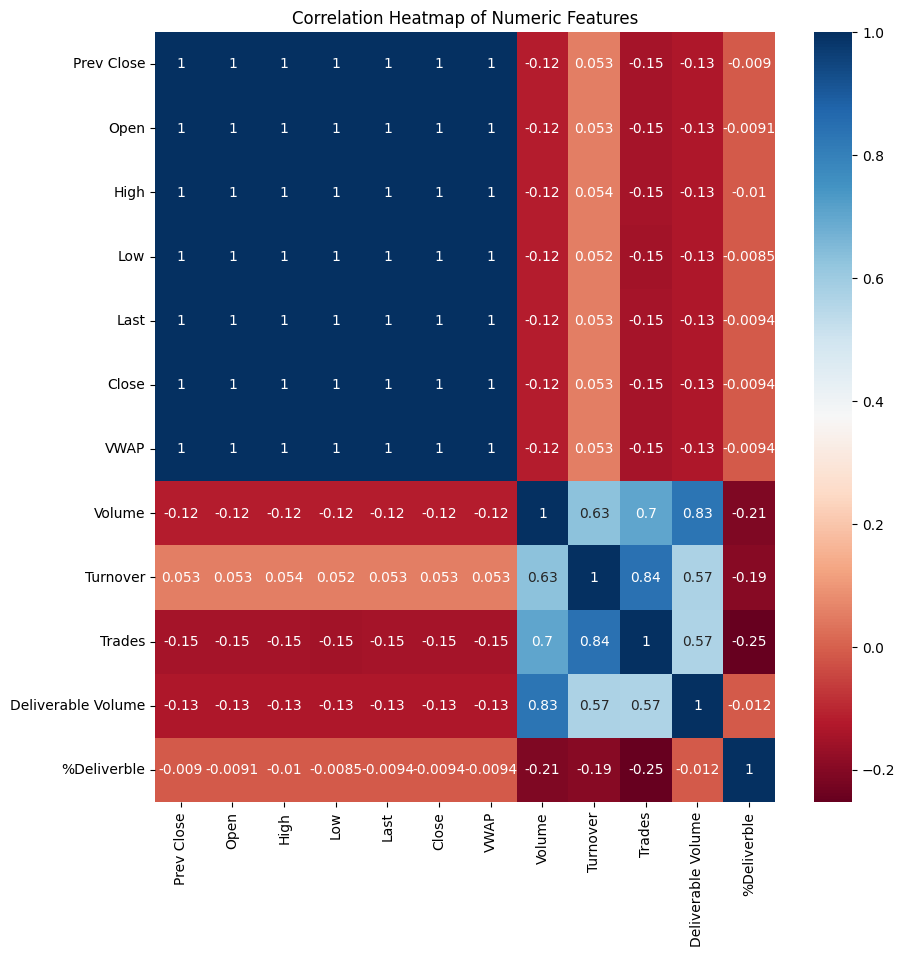

In [ ]:
correlation_matrix=dataset[["Prev Close","Open","High","Low","Last","Close","VWAP","Volume","Turnover","Trades","Deliverable Volume","%Deliverble"]].corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="RdBu")
plt.title("Correlation Heatmap of Dataset Features")
plt.show()

We see many features are closely correlated to each other. Featurs having >0.9 correlation are quite redundant and won't affect predictions even if we remove all but one of them.